## PROJECT-2: PART-3 - Machine Learning: Artificial Neural Network


---

In [13]:
# Initial imports
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

In [14]:
# Set a random seed for TensorFlow to allow reproducible testing results
#tf.random.set_seed(126)

In [15]:
# Read in data
df = pd.read_csv("Sentiment_Scores_1.csv")
sentiment_scores = df.dropna()
data = sentiment_scores.drop(columns=['Unnamed: 0','Stock','Date','JSON File Name'])
data.head()

,Buy/Sell,Sentiment Score
1,1,-0.4767
2,1,0.9075
3,1,0.5236
5,1,0.2023
6,1,0.9756


In [16]:
# Creating Feature and Target
X = data['Sentiment Score']
y = data['Buy/Sell']
# Creating training and testing datasets for logistic Regression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=79, 
                                                    )

In [25]:
# Define the model - deep neural net
number_inputs = 1
hidden_nodes_layer = 252

nn = Sequential()
#First hidden layer
nn.add(Dense(units=hidden_nodes_layer, input_dim=number_inputs, activation="relu"))
#Second hidden layer
nn.add(Dense(units=hidden_nodes_layer, activation="relu"))
#Third hidden layer
nn.add(Dense(units=hidden_nodes_layer, activation="relu"))
#Fourth hidden layer
nn.add(Dense(units=hidden_nodes_layer, activation="relu"))
#Output layer
nn.add(Dense(units=1, activation="sigmoid"))


# Compile model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [26]:
# Printing Model Summary
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 252)               504       
_________________________________________________________________
dense_11 (Dense)             (None, 252)               63756     
_________________________________________________________________
dense_12 (Dense)             (None, 252)               63756     
_________________________________________________________________
dense_13 (Dense)             (None, 252)               63756     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 253       
Total params: 192,025
Trainable params: 192,025
Non-trainable params: 0
_________________________________________________________________


8. Fit the model with `250` epochs.

In [27]:
# Fit the model
model = nn.fit(X_train, y_train, epochs=250)

Epoch 1/250
12/12 [==============================] - 1s 5ms/step - loss: 0.6957 - accuracy: 0.5198
Epoch 2/250
12/12 [==============================] - 0s 7ms/step - loss: 0.6925 - accuracy: 0.5053
Epoch 3/250
12/12 [==============================] - 0s 6ms/step - loss: 0.6921 - accuracy: 0.5369
Epoch 4/250
12/12 [==============================] - 0s 7ms/step - loss: 0.6912 - accuracy: 0.5402
Epoch 5/250
12/12 [==============================] - 0s 7ms/step - loss: 0.6923 - accuracy: 0.5528
Epoch 6/250
12/12 [==============================] - 0s 5ms/step - loss: 0.6927 - accuracy: 0.5352
Epoch 7/250
12/12 [==============================] - 0s 6ms/step - loss: 0.6896 - accuracy: 0.5861
Epoch 8/250
12/12 [==============================] - 0s 5ms/step - loss: 0.6904 - accuracy: 0.4813
Epoch 9/250
12/12 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.4898
Epoch 10/250
12/12 [==============================] - 0s 7ms/step - loss: 0.6927 - accuracy: 0.5382
Epoch 11/

9. Plot the loss function and accuracy.

In [29]:
# Evaluate the model fit with linear dummy data
model_loss, model_accuracy = nn.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

4/4 - 0s - loss: 0.6877 - accuracy: 0.5691
Loss: 0.6877321004867554, Accuracy: 0.5691056847572327


In [30]:
# Create a dataframe with the history dictionary
df_plot = pd.DataFrame(model.history, index=range(1, len(model.history["loss"]) + 1))

In [31]:
df_plot

,loss,accuracy
1,0.698236,0.487738
2,0.692779,0.514986
3,0.693028,0.493188
4,0.693247,0.509537
5,0.693647,0.520436
...,...,...
246,0.679925,0.531335
247,0.679696,0.539510
248,0.682646,0.531335
249,0.680502,0.564033


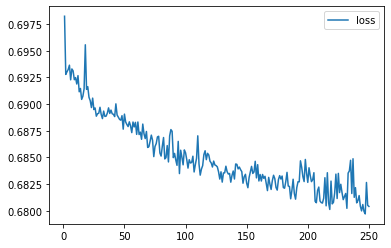

In [32]:
# Plot the loss
df_plot.plot(y="loss")

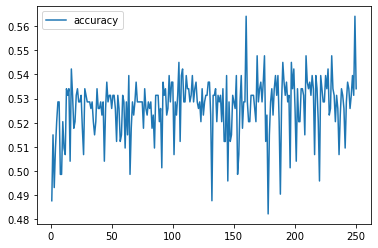

In [33]:
# Plot the accuracy
df_plot.plot(y="accuracy")
